In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import Imputer 
from pylab import savefig
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [5]:
losses=pd.read_csv('automobile-losses.csv')
risk=pd.read_csv('automobile-risk.csv')
spec=pd.read_csv('automobile-spec.csv')

In [6]:
losses.head()

,ID,normalized-losses
0,1,NaN
1,2,NaN
2,3,NaN
3,4,164.0
4,5,164.0


In [7]:
risk.head()

,ID,symboling
0,1,3
1,2,3
2,3,1
3,4,2
4,5,2


In [8]:
spec.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# USE CASE

## PART 1

### Join 3 tables using ID as key

In [9]:
result1 = pd.merge(losses,
                 risk[['ID', 'symboling']],
                 on='ID', 
                 how='left')
result2= pd.merge(result1,
                 spec,
                 on='ID',
                 how='left')

### quick look (dimension, data type, head/tail, summary statistics etc)

In [10]:
result2.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,NaN,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [11]:
result2.tail()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,201,95.0,-1,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,202,95.0,-1,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,203,95.0,-1,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,204,95.0,-1,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,205,95.0,-1,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [12]:
result2.shape

(205, 27)

In [13]:
result2.describe().round(2)

,ID,normalized-losses,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.00,164.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,201.00,201.00,205.00,203.00,203.00,205.00,205.00,201.00
mean,103.00,122.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.26,5125.37,25.22,30.75,13207.13
std,59.32,35.44,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.32,3.97,39.71,479.33,6.54,6.89,7947.07
min,1.00,65.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,94.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7775.00
50%,103.00,115.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,150.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.59,3.41,9.40,116.00,5500.00,30.00,34.00,16500.00
max,205.00,256.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [14]:
result2.dtypes

ID                     int64
normalized-losses    float64
symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheel           object
engine-loc            object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
cylinder              object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### identify missing value

In [15]:
count_missing=result2.isnull().sum().sort_values(ascending=False)
count_missing.head()

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
dtype: int64

In [16]:
result3=result2.fillna(result2.mean())
count_missing1=result3.isnull().sum().sort_values(ascending=False)
count_missing1.head(10)

num-of-doors         1
price                0
width                0
normalized-losses    0
symboling            0
make                 0
fuel-type            0
aspiration           0
body-style           0
drive-wheel          0
dtype: int64

In [17]:
result3=result3.dropna()
result3.isnull().sum().sort_values(ascending=False)

price                0
width                0
normalized-losses    0
symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
height               0
highway-mpg          0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
ID                   0
dtype: int64

### Visualization 

In [18]:
result3.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,122.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,122.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,122.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [19]:
kategorik=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheel',
'engine-loc','engine-type','cylinder','fuel-system']
numerical=result3.drop(kategorik,axis=1)
categorical=result3[kategorik]
numerical.head()

,ID,normalized-losses,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,122.0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,122.0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,122.0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [20]:
categorical.describe()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,engine-type,cylinder,fuel-system
count,204,204,204,204,204,204,204,204,204,204
unique,22,2,2,3,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,184,168,114,95,119,201,147,158,93


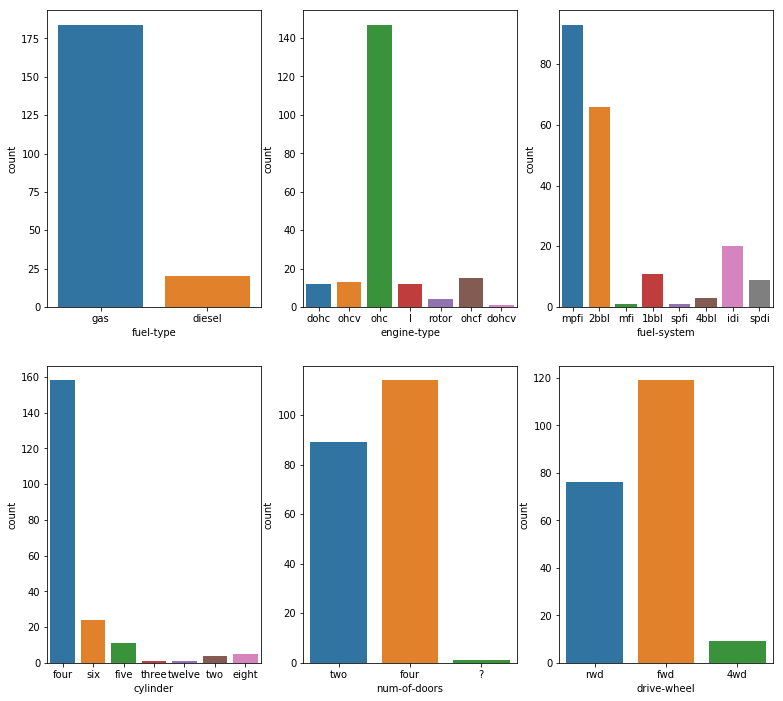

In [21]:
f=plt.figure(figsize=(13,12))
f.add_subplot(2,3,1)
sns.countplot(categorical['fuel-type'])
f.add_subplot(2,3,2)
sns.countplot(categorical['engine-type'])
f.add_subplot(2,3,3)
sns.countplot(categorical['fuel-system'])
f.add_subplot(2,3,4)
sns.countplot(categorical['cylinder'])
f.add_subplot(2,3,5)
sns.countplot(categorical['num-of-doors'])
f.add_subplot(2,3,6)
sns.countplot(categorical['drive-wheel'])




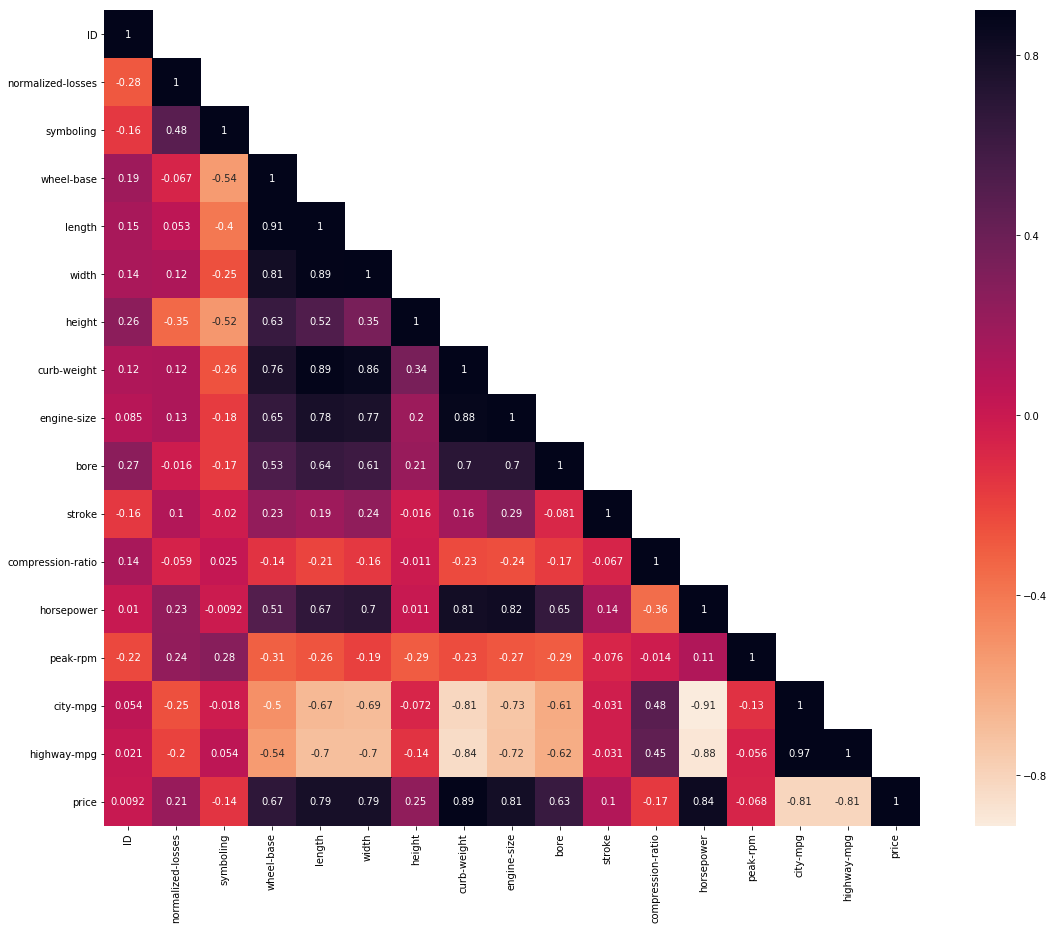

In [22]:
#create correlation
corr = result3.corr(method = 'spearman')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,15)
cmap=sns.cm.rocket_r
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True, cmap=cmap)

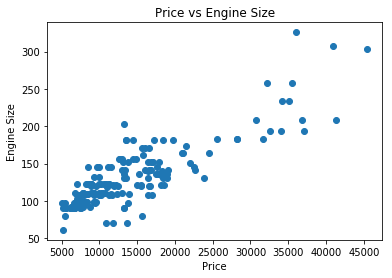

In [23]:
plt.scatter(result3['price'],result3['engine-size'])
plt.title('Price vs Engine Size')
plt.xlabel('Price')
plt.ylabel('Engine Size')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

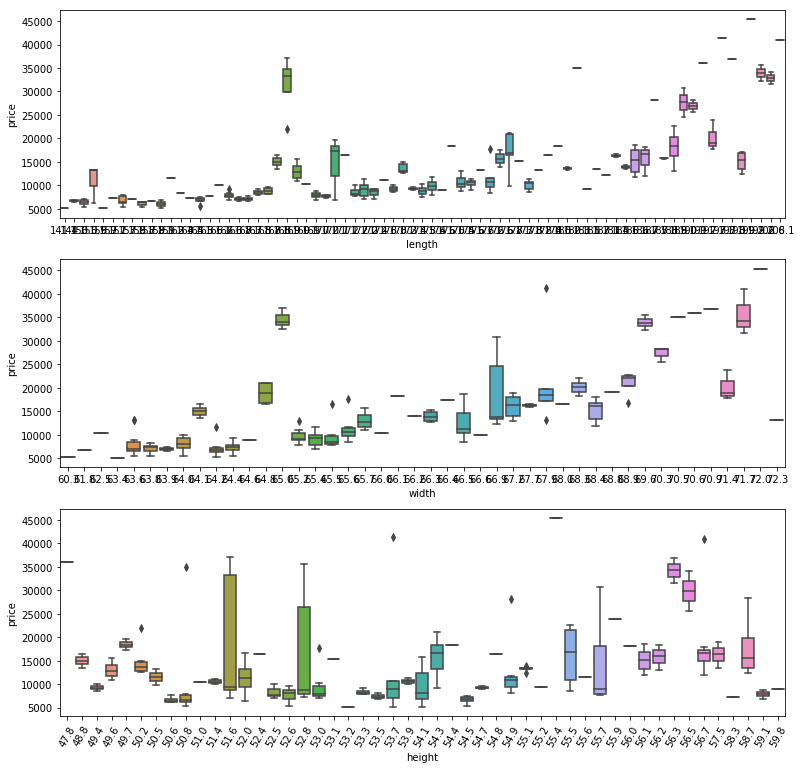

In [24]:
f=plt.figure(figsize=(13,13))
f.add_subplot(3,1,1)
g = sns.boxplot(y=result3["price"], x=result3['length'])
f.add_subplot(3,1,2)
g = sns.boxplot(y=result3["price"], x=result3['width'])
f.add_subplot(3,1,3)
g = sns.boxplot(y=result3["price"], x=result3['height'])
plt.xticks(rotation=60)

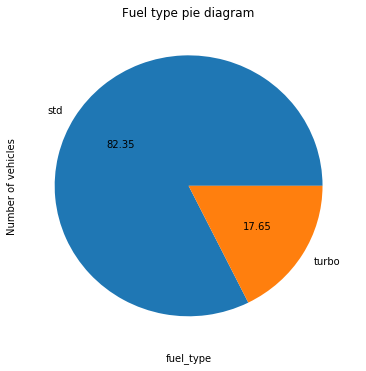

In [25]:
result3['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuel_type');

## PART 2

### Car brand with highest price

In [26]:
car_brand=result3.sort_values(by=['price'],ascending=False).head(1)[['make','price']]
car_brand

,make,price
74,mercedes-benz,45400.0


### Maximum horsepower for car with 6 cylinder engine

In [27]:
result3[result3.cylinder == 'six'].sort_values(by=['horsepower'],ascending=False).head(1)[['horsepower','cylinder']]

,horsepower,cylinder
126,207.0,six


### Average peak rpm for turbo style aspiration car

In [28]:
result3[result3.aspiration == 'turbo'][['peak-rpm']].mean()

peak-rpm    4923.611111
dtype: float64

###  Average price based on body-style

In [29]:
pd.DataFrame(result3.groupby(['body-style']).mean().round(2)['price'])

,price
body-style,
convertible,21890.50
hardtop,22208.50
hatchback,10050.29
sedan,14495.51
wagon,12371.96


### Average price based on body-style only for Honda car (make=Honda)

In [36]:
result3_honda=(result3[result3['make']=='honda'])
pd.DataFrame(result3_honda.groupby(['body-style']).mean().round(2)['price'])

,price
body-style,
hatchback,7054.43
sedan,9945.00
wagon,7295.00
